In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

gif = Image.open("Pendulum-no-text.gif")

frames = []

try:
    while True:
        frame_array = np.array(gif.convert("RGBA"))
        frames.append(frame_array)
        gif.seek(gif.tell() + 1)
except EOFError:
    pass  

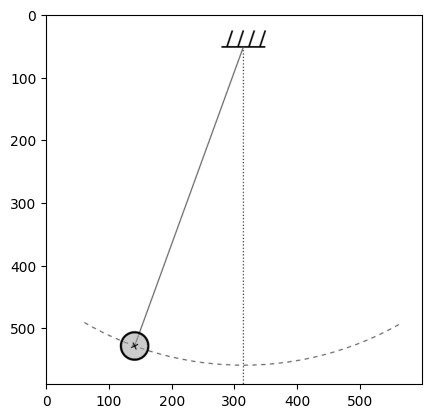

In [4]:
frames = np.mean(frames, axis=3)
plt.imshow(frames[0], cmap="gray")

In [5]:
columns = []
for frame in frames:
    columns.append(frame.flatten())
M = np.array(columns).T

In [6]:
U, s, V = np.linalg.svd(M, full_matrices=False)

In [7]:
# reconstruct the image using the first 10 singular values
n = 10
reconstructed = U[:, :n] @ np.diag(s[:n]) @ V[:n, :]

In [8]:
frames_reconstructed = []
for row in reconstructed.T:
    frames_reconstructed.append(row.reshape(590, 600))

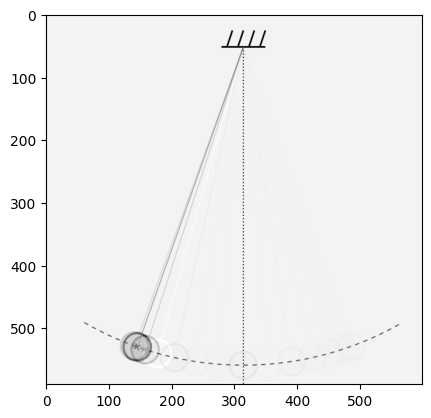

In [9]:
plt.imshow(frames_reconstructed[0], cmap="gray")

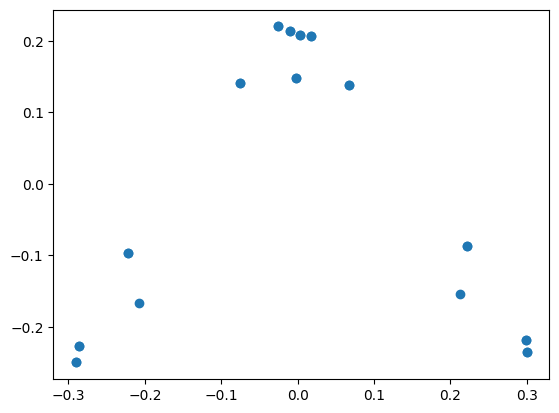

In [13]:
xs, ys = V[1:3]
plt.scatter(xs, ys)

In [12]:
V[1:3]

array([[-1.88967146e-01, -1.88978243e-01, -1.88983701e-01,
        -1.88974998e-01, -1.88972606e-01, -1.88972440e-01,
        -1.88976125e-01, -1.89070181e-01, -1.88975543e-01,
        -1.88975465e-01, -1.88973272e-01, -1.88977959e-01,
        -1.88975229e-01, -1.88977435e-01, -1.88969038e-01,
        -1.88977435e-01, -1.88975229e-01, -1.88977959e-01,
        -1.88973272e-01, -1.88975465e-01, -1.88975543e-01,
        -1.89070181e-01, -1.88976125e-01, -1.88972440e-01,
        -1.88972606e-01, -1.88974998e-01, -1.88983701e-01,
        -1.88978243e-01],
       [-2.08046977e-01, -2.90284589e-01, -2.86342443e-01,
        -2.21889401e-01, -7.56605630e-02, -2.55270746e-02,
        -9.47703505e-03, -2.50131176e-03,  3.09009872e-03,
         1.78716775e-02,  6.70950688e-02,  2.21793319e-01,
         2.99659556e-01,  3.00088968e-01,  2.12234552e-01,
         3.00088968e-01,  2.99659556e-01,  2.21793319e-01,
         6.70950688e-02,  1.78716775e-02,  3.09009872e-03,
        -2.50131176e-03, -9.47